In [ ]:
# Image Classification with CNN for Malaria Data

In [ ]:
#Infected / Uninfected

In [33]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [35]:
%cd /gdrive/My Drive/

/gdrive/My Drive


In [59]:
#%cp -av /content/Uninfected/ /content/cell_images/Uninfected/
#%cp -av /content/Parasitized/ /content/cell_images/Parasitized/


In [1]:
#pip install kaggle

In [ ]:
#from google.colab import drive
#drive.mount('content/drive')

In [ ]:
##!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
#!kaggle datasets download -d debeshjha1/kvasirinstrument

In [ ]:
!unzip /content/Parasitized.rar

Archive:  /content/Parasitized.rar
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Parasitized.rar or
        /content/Parasitized.rar.zip, and cannot find /content/Parasitized.rar.ZIP, period.


In [65]:
#Kütüphanerlerin Yüklenmesi
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#from zipfile import ZipFile
#ZipFile("Parasitized.rar").extractall("/content/Parasitized")

In [17]:
#pip install patool

In [76]:
#     0     Successful operation.
#     1     Non fatal error(s) occurred.
#     2     A fatal error occurred.
#     3     Invalid checksum. Data is damaged.
#     4     Attempt to modify an archive locked by 'k' command.
#     5     Write error.
#     6     File open error.
#     7     Wrong command line option.
#     8     Not enough memory.
#     9     File create error
#    10     No files matching the specified mask and options were found.
#    11     Wrong password.
#   255     User stopped the process.

#import patoolib
import patoolib
#patoolib.extract_archive("/content/Uninfected.rar", outdir="/content/")
#patoolib.extract_archive("/content/Parasitized.rar", outdir="/content/")
#patoolib.extract_archive("/content/cell_images.rar", outdir="/content/")

In [ ]:
## Traing and TEst Data Set

(([], []), ([], []))

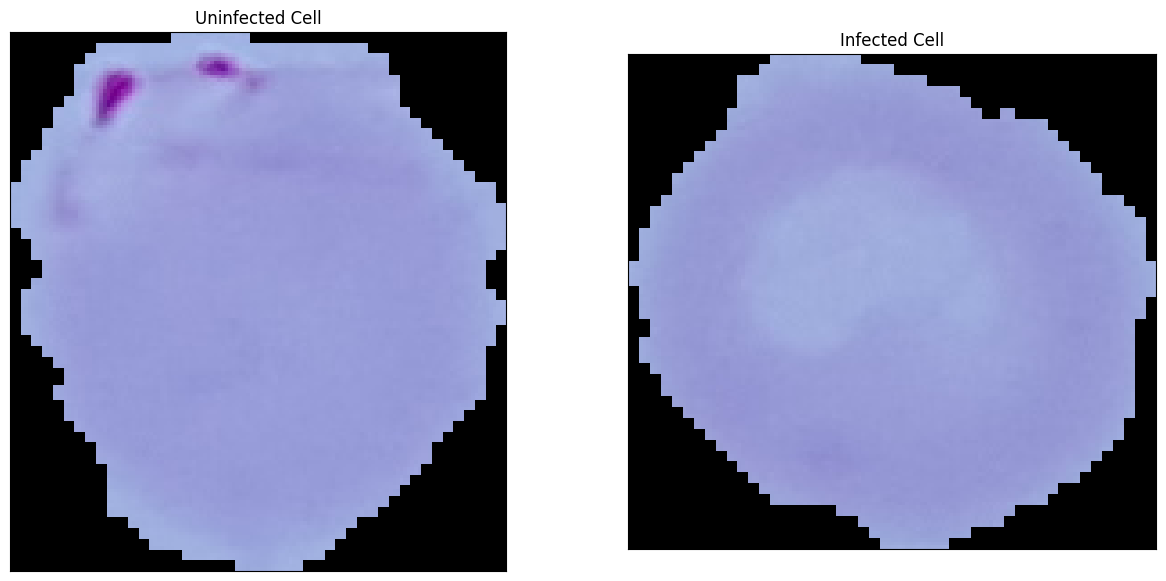

In [67]:
import cv2

Uninfected='/content/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png'
Parasitized='/content/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(Parasitized))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(Uninfected))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

In [68]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [50]:
#cp -r /content/Uninfected/. /content/cell_images/Uninfected/

##rsync /content/Uninfected /content/cell_images/

In [21]:
#cp -a /content/Parasitized/ /content/cell_images/Parasitized/
##cp -r /content/Uninfected /content/cell_images/

In [69]:
width, height = 128,128
trainDatagen = datagen.flow_from_directory(directory='/content/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16, 
                                           subset='training')

valDatagen = datagen.flow_from_directory(directory='/content/cell_images/',
                                           target_size=(width,height), class_mode = 'binary', batch_size = 16,
                                           subset='validation')

Found 17068 images belonging to 2 classes.
Found 4266 images belonging to 2 classes.


In [ ]:
## Model Preparition

In [70]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 32)       

In [72]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =10, validation_data = valDatagen,
                              validation_steps=len(valDatagen))

Epoch 1/10


<ipython-input-73-11085055a438>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen, steps_per_epoch = len(trainDatagen), epochs =10, validation_data = valDatagen,


1067/1067 [==============================] - 383s 357ms/step - loss: 0.5747 - accuracy: 0.7073 - val_loss: 0.6365 - val_accuracy: 0.6662
Epoch 2/10
1067/1067 [==============================] - 375s 352ms/step - loss: 0.3598 - accuracy: 0.8374 - val_loss: 0.1968 - val_accuracy: 0.9231
Epoch 3/10
1067/1067 [==============================] - 377s 354ms/step - loss: 0.1682 - accuracy: 0.9465 - val_loss: 0.1605 - val_accuracy: 0.9372
Epoch 4/10
1067/1067 [==============================] - 362s 339ms/step - loss: 0.1463 - accuracy: 0.9530 - val_loss: 0.1603 - val_accuracy: 0.9407
Epoch 5/10
1067/1067 [==============================] - 360s 337ms/step - loss: 0.1363 - accuracy: 0.9565 - val_loss: 0.1557 - val_accuracy: 0.9433
Epoch 6/10
1067/1067 [==============================] - 381s 358ms/step - loss: 0.1282 - accuracy: 0.9581 - val_loss: 0.1617 - val_accuracy: 0.9381
Epoch 7/10
1067/1067 [==============================] - 372s 348ms/step - loss: 0.1272 - accuracy: 0.9590 - val_loss: 0.161

In [ ]:
##Model Çıktıları

In [74]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.574665,0.707347,0.636493,0.666198
1,0.359798,0.837356,0.196814,0.923113
2,0.168186,0.946508,0.160468,0.937178
3,0.146273,0.953012,0.160334,0.940694
4,0.136308,0.956468,0.155713,0.943272
5,0.128164,0.958050,0.161700,0.938115
6,0.127167,0.959046,0.160999,0.941866
7,0.120246,0.959105,0.150987,0.945148
8,0.115518,0.961273,0.153065,0.942569
9,0.117388,0.959866,0.168326,0.939287


In [ ]:
##Görselleşrirme

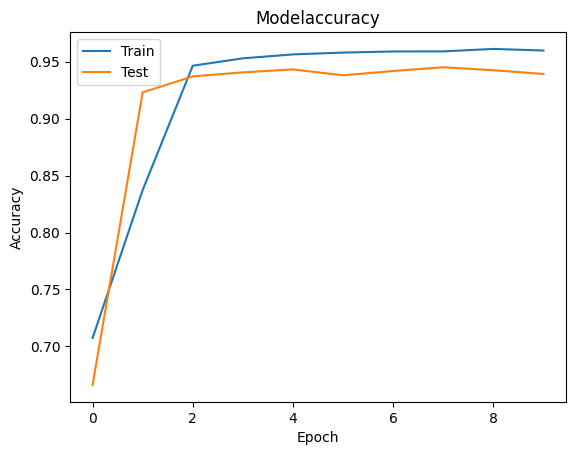

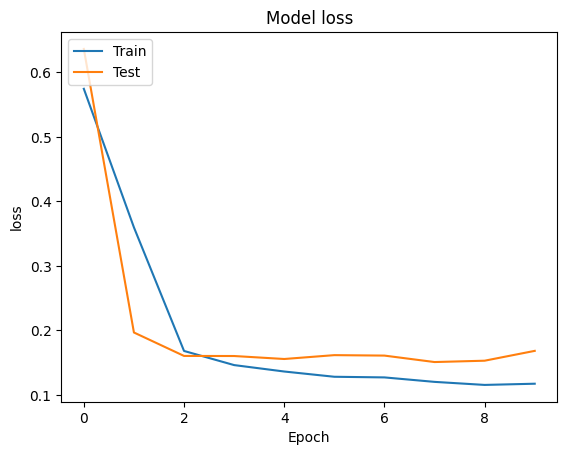

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()